In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)
print(tf.keras.__version__)

2.1.0
2.2.4-tf


In [3]:
from keras import backend as k

Using TensorFlow backend.


In [4]:
from tensorflow.keras import backend as K
const = K.constant([[42,24],[11,99]],dtype = tf.float16,shape = [2,2])
const

<tf.Tensor: shape=(2, 2), dtype=float16, numpy=
array([[42., 24.],
       [11., 99.]], dtype=float16)>

# Keras Models

## The Keras Sequential Model

### There are two ways to create a sequential model.

## 1) First Way

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

#### The epochs variable stores the number of times we are going to present the data to the model

In [9]:
import matplotlib.pyplot as plt

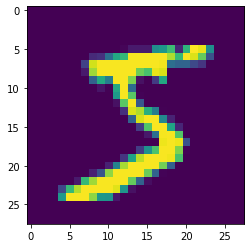

In [10]:
plt.imshow(train_x[0])

In [11]:
epochs = 10
batch_size = 32

#### Normalize all the data points to be in the float range zero to one 

In [14]:
train_x, test_x = tf.cast(train_x/255,tf.float32),tf.cast(test_x/255,tf.float32)

In [15]:
train_y, test_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64)

In [16]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [17]:
optimiser = tf.keras.optimizers.Adam()
model1.compile(optimizer=optimiser,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
model1.fit(train_x,train_y,batch_size = batch_size,epochs = epochs)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2175 - accuracy: 0.9353
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0959 - accuracy: 0.9713
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0700 - accuracy: 0.9780
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0530 - accuracy: 0.9831
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0424 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0346 - accuracy: 0.9883
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0306 - accuracy: 0.9897
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0273 - accuracy: 0.9905
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0259 - accuracy: 0.9913
Epoch 10/10
60

In [84]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  401920    
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [85]:
model1.evaluate(test_x,test_y)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0786 - accuracy: 0.9827


[0.07859148816871966, 0.9827]

## 2) Second Way

In [86]:
model2 = tf.keras.models.Sequential();
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(512,activation = 'relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax ))
model2.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [87]:
model2.fit(train_x,train_y,batch_size = batch_size,epochs = epochs)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2215 - accuracy: 0.9346
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0947 - accuracy: 0.9707
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0695 - accuracy: 0.9781
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0530 - accuracy: 0.9833
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0436 - accuracy: 0.9862
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0365 - accuracy: 0.9880
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0306 - accuracy: 0.9898
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0268 - accuracy: 0.9907
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0241 - accuracy: 0.9915
Epoch 10/10
60

In [88]:
model2.evaluate(test_x,test_y)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.0641 - accuracy: 0.9834


[0.06409181974315725, 0.9834]

## The Keras functional API

In [89]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x,train_y),(test_x,test_y) = mnist.load_data()
train_x,test_x = train_x/255.0,test_x/255.0

In [90]:
from IPython.core.display import display, HTML

def force_show_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))

In [91]:
train_x[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [92]:
inputs = tf.keras.Input(shape = (28,28)) # Returns a 'placeholder' tensor
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(512,activation = 'relu',name = 'd1')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(10,activation=tf.nn.softmax,name = 'd2')(x)
model3 = tf.keras.Model(inputs = inputs,outputs = predictions)

In [93]:
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
d1 (Dense)                   (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
d2 (Dense)                   (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [94]:
tf.keras.utils.plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [95]:
print(model3.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
d1 (Dense)                   (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
d2 (Dense)                   (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
28*28

784

In [97]:
784*512+512

401920

In [98]:
(512+1)*10

5130

In [99]:
401920 + 5130

407050

## Saving a Model

In [103]:
model1.save('/home/mbangaru/MyPrac/Model1.h5')

## Loading a Saved Model

In [104]:
from tensorflow.keras.models import load_model
new_model = load_model('/home/mbangaru/MyPrac/Model1.h5')

#### It is also possible to save just the model weights and load them with this (in which case, you must build your architecture to load the weights into): 

In [107]:
model1.save_weights('/home/mbangaru/MyPrac/Model1.h5')

#### Then use the following to load it: model.load_weights('/home/mbangaru/MyPrac/Model1.h5')

# Keras Datasets

In [109]:
from tensorflow.keras.datasets import fashion_mnist

In [110]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [111]:
import matplotlib.pyplot as plt

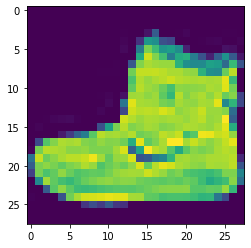

In [112]:
plt.imshow(train_x[0])

In [115]:
len(train_x[0])

28

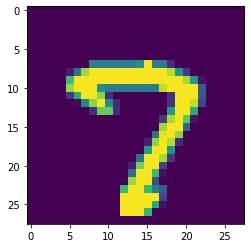

In [19]:
plt.imshow(train_x[52])

In [23]:
import numpy as np

In [24]:
a = tf.Variable([[1,2,3],[4,5,6]], dtype=tf.float32)

In [26]:
a.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [29]:
a.assign([[4,5,6],[1,2,3]])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>